# Image Classification - CNN
By Sovanna Ramirez

## Introduction

In this assignment I will gain experience with Python using Keras. In this dataset **Chessman Image Dataset** found here: https://www.kaggle.com/datasets/niteshfre/chessman-image-dataset we aim to have our model identify images and classify them as a bishop, king, knight, pawn, queen, or rook. Using this data set, I will try to train my models to identify whether an image is a bishop, king, knight, pawn, queen, or rook.

In [3]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow.io
import tensorflow.keras
import tensorflow.image
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Train/Test Split
From our dataset we can see that we are working with **six** classes. We see that after performing the train/test split on our dataset that out of the 552 files, 80% of those, or 442 files, are dedicated to training and 20%, or 110 files are dedicated for validation purposes. The classes of this dataset include: bishop, king, knight, pawn, queen, and rook.

In [4]:
batch_size = 128
img_height = 160
img_width = 160
epochs = 20

path = "/kaggle/input/chessman-image-dataset/Chessman-image-dataset/Chess"

train_dataset = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split = 0.2,
    subset = 'training',
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

validation_data = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split = 0.2,
    subset = 'validation',
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

class_names = train_dataset.class_names
print("\nClass Names:", class_names)

Found 552 files belonging to 6 classes.
Using 442 files for training.
Found 552 files belonging to 6 classes.
Using 110 files for validation.

Class Names: ['Bishop', 'King', 'Knight', 'Pawn', 'Queen', 'Rook']


In [5]:
validation_batch = tf.data.experimental.cardinality(validation_data)
test_dataset = validation_data.take(validation_batch // 3)
validation_data = validation_data.skip(validation_batch // 3)

print('Validation Batches: %d' % tf.data.experimental.cardinality(validation_data))
print('Test Batches: %d' % tf.data.experimental.cardinality(test_dataset))

Validation Batches: 1
Test Batches: 0


## Graphing Distribution of Target Classes
Upon graphing our distribution of target classes we can see the number of images per chess piece, with pawn having the most images.

[87, 76, 106, 107, 78, 102]


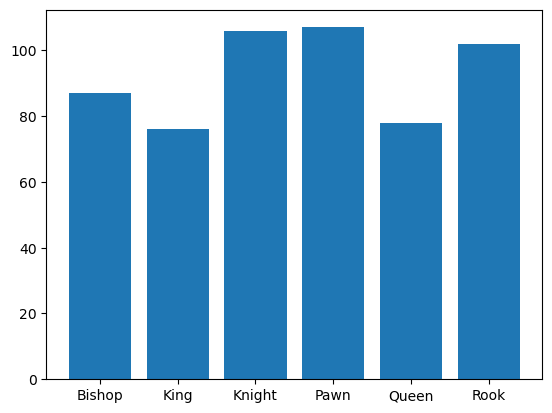

In [6]:
import fnmatch

class_distribution = []

for classification in class_names:
    dir_path = os.path.join(path, classification)
    count = len(fnmatch.filter(os.listdir(dir_path),'*.*'))
    class_distribution.append(count)
    
print(class_distribution)

x = np.array(class_names)
y = np.array(class_distribution)

plt.bar(x,y)
plt.show()

## Building the CNN Model
To start building our sequential model we have 2 hidden layers with 512 nodes in each. Upon building the model we compile it and print out a summary. From our summary we see that we get a total of 667,654 parameters. Meaning that with every hidden unit you have about 66,765 input weights and one weight of connection with bias.

In [11]:
num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1./255, input_shape=(28,28)),
    layers.Conv2D(16,3,padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

ValueError: Input 0 of layer "conv2d_2" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 28, 28)

In [12]:
# Train the Model
history = model.fit(
    train_dataset,
    epochs = epochs,
    validation_data = validation_data
)

# Evaluate the Model
score = model.evaluate(validation_data, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

NameError: name 'model' is not defined